# **K-Means**

### K-Means Overview

**K-means** is one of the most basic clustering algorithms.  It relies on finding cluster centers to group data points based on minimizing the sum of squared errors between each datapoint and its cluster center.  

In [ ]:
# Setup and imports
# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

In [ ]:
plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")

K-means clustering is one of the most simple clustering algorithms.  One of the limitations is that it depends on the starting point of the clusters, and the number of clusters need to be defined beforehand.

### Cluster starting points
Let's start by creating a simple dataset.

In [ ]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

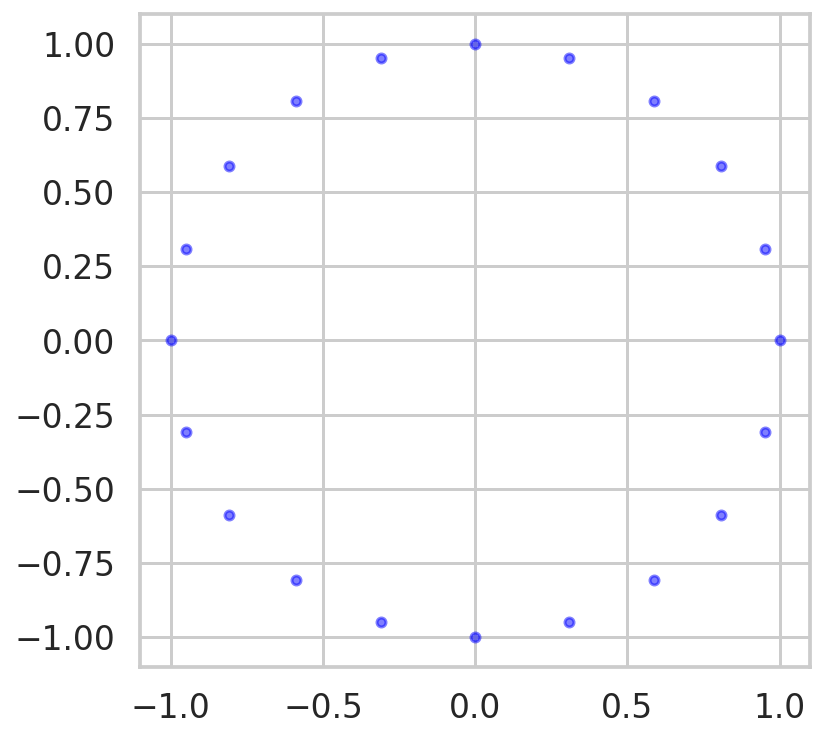

In [ ]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
display_cluster(X)

In [ ]:
X

array([[ 1.00000000e+00,  0.00000000e+00],
       [ 9.51056516e-01,  3.09016994e-01],
       [ 8.09016994e-01,  5.87785252e-01],
       [ 5.87785252e-01,  8.09016994e-01],
       [ 3.09016994e-01,  9.51056516e-01],
       [ 6.12323400e-17,  1.00000000e+00],
       [-3.09016994e-01,  9.51056516e-01],
       [-5.87785252e-01,  8.09016994e-01],
       [-8.09016994e-01,  5.87785252e-01],
       [-9.51056516e-01,  3.09016994e-01],
       [-1.00000000e+00,  1.22464680e-16],
       [-9.51056516e-01, -3.09016994e-01],
       [-8.09016994e-01, -5.87785252e-01],
       [-5.87785252e-01, -8.09016994e-01],
       [-3.09016994e-01, -9.51056516e-01],
       [-1.83697020e-16, -1.00000000e+00],
       [ 3.09016994e-01, -9.51056516e-01],
       [ 5.87785252e-01, -8.09016994e-01],
       [ 8.09016994e-01, -5.87785252e-01],
       [ 9.51056516e-01, -3.09016994e-01]])

Let's now group this data into two clusters.  We will use two different random states to initialize the algorithm. Setting a the __[random state](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState)__ variable is useful for testing and allows us to seed the randomness (so we get the same results each time).

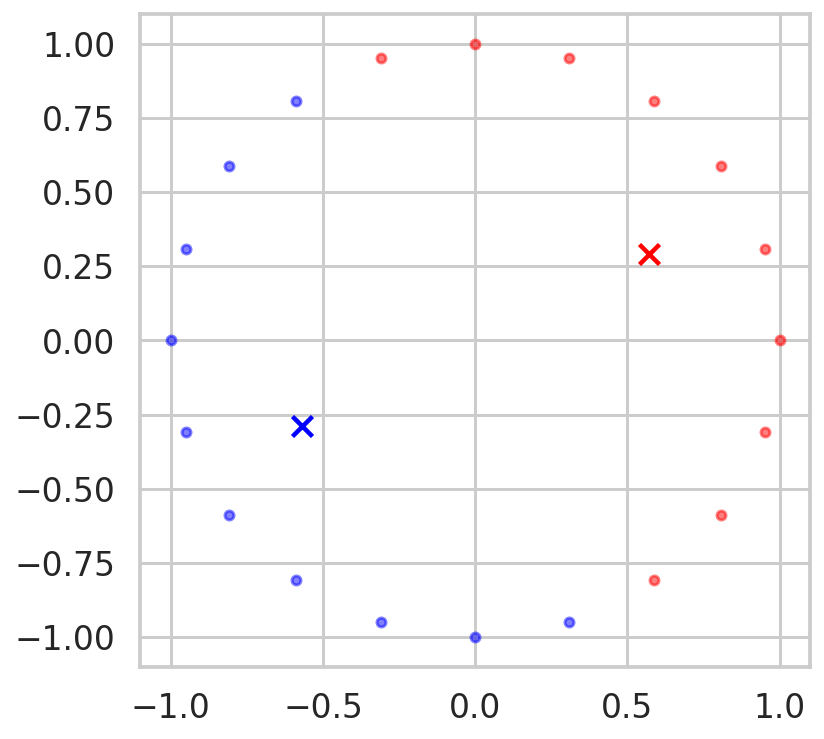

In [ ]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(X)
display_cluster(X,km,num_clusters)

Clustering with a random state of 20:

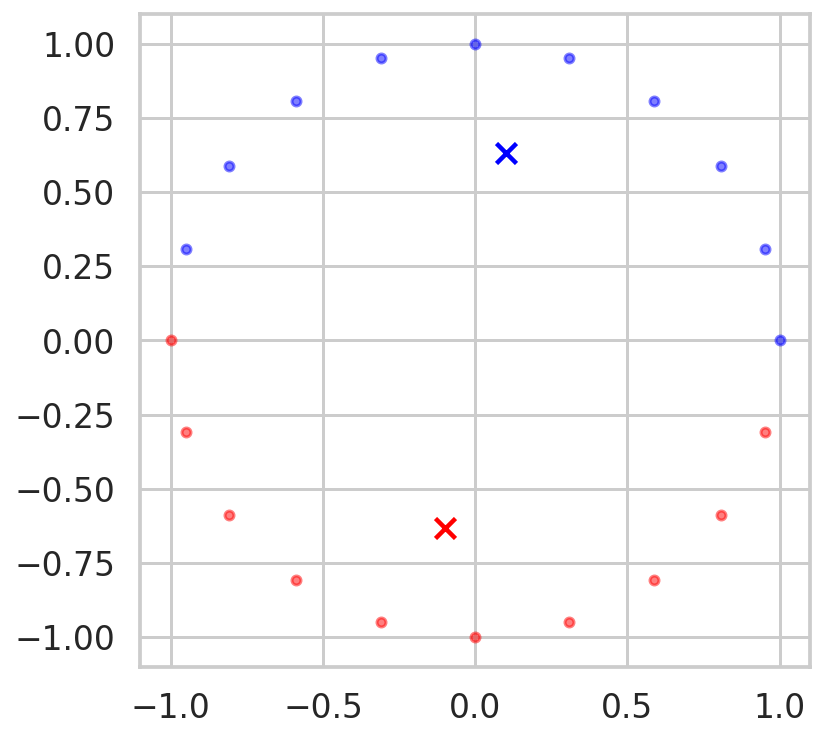

In [ ]:
km = KMeans(n_clusters=num_clusters,random_state=20,n_init=1)
km.fit(X)
display_cluster(X,km,num_clusters)

Why are the clusters different when we run  the K-means twice?

It's because the starting points of the cluster centers have an impact on where the final clusters lie.  The starting point of the clusters is controlled by the random state.

### Determining optimium number of clusters

Let's create a new dataset that visually consists on a few clusters and try to group them.

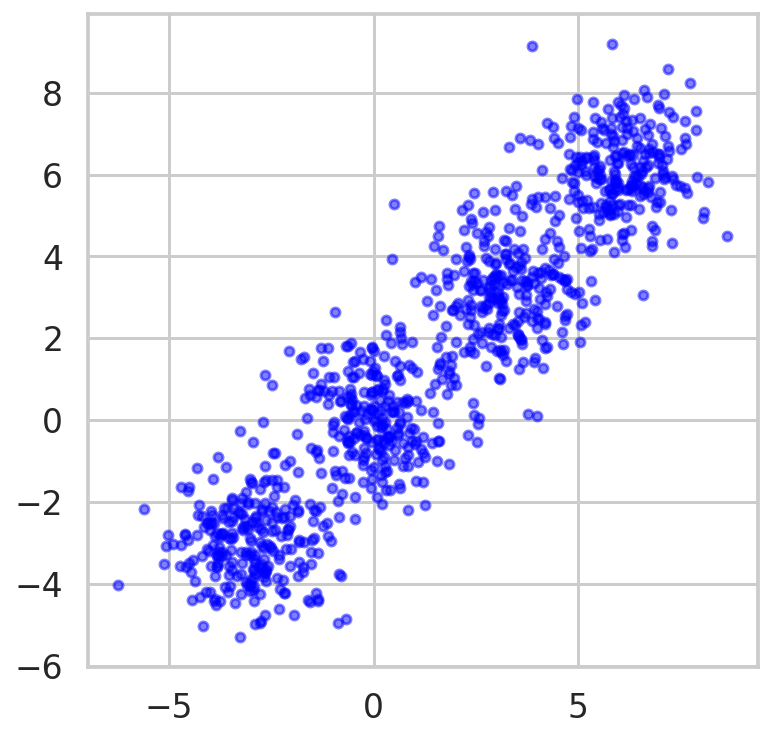

In [ ]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

Let's run K-means with seven clusters.

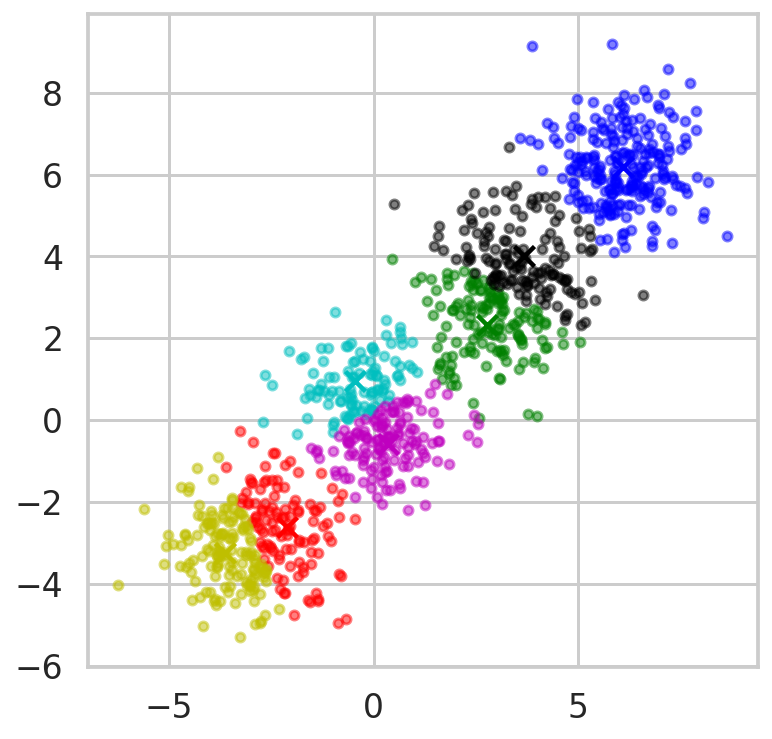

In [ ]:
num_clusters = 7
km = KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X,km,num_clusters)

Now let's re-run the algorithm with four clusters.

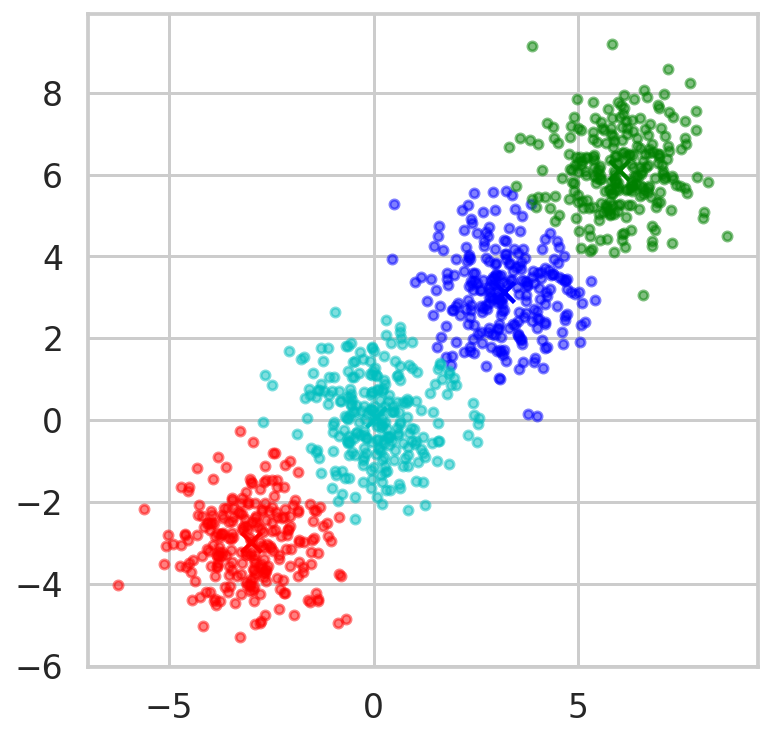

In [ ]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X,km,num_clusters)

- In this case it may be visually obvious that four clusters is better than seven.  
- This is because we can easily view the data in two dimensional space.  
- However, real world data usually has more than two dimensions.  
- A dataset with a higher dimensional space is hard to visualize.  
- A way of solving this is to plot the **inertia** 

**inertia**: (sum of squared error between each point and its cluster center) as a function of the number of clusters. 

In [ ]:
km.inertia_

1880.174402277564

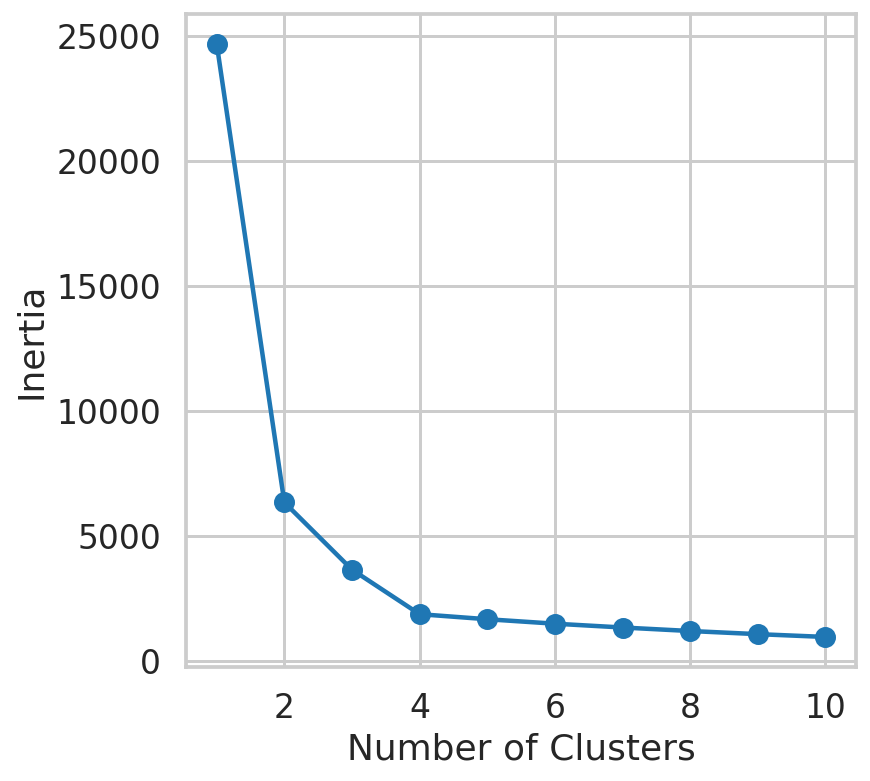

In [ ]:
### BEGIN SOLUTION
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');
### END SOLUTION

seems like 4 clusters is best

### Clustering Colors from an Image

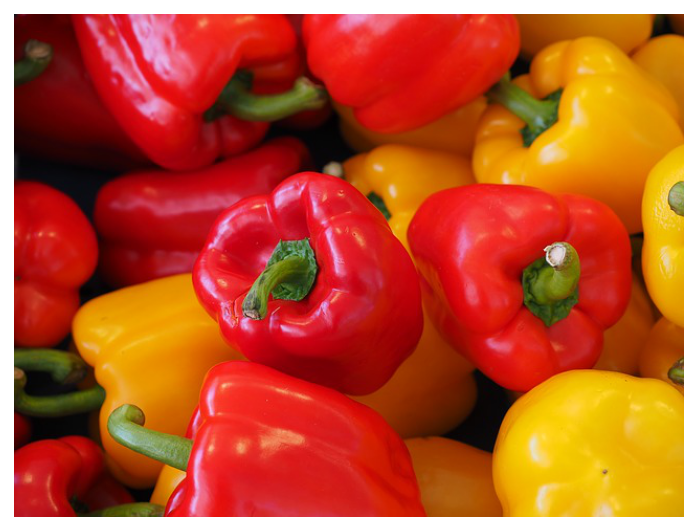

In [ ]:
img = plt.imread('/content/peppers.jpg')
plt.imshow(img)
plt.axis('off');

In [ ]:
img

array([[[ 15,  18,  25],
        [ 26,  16,  24],
        [ 42,  15,  22],
        ...,
        [129,  48,   1],
        [132,  50,   2],
        [134,  50,   3]],

       [[ 24,  17,  25],
        [ 30,  15,  22],
        [ 45,  12,  19],
        ...,
        [123,  45,   0],
        [127,  46,   0],
        [129,  47,   0]],

       [[ 36,  15,  24],
        [ 42,  12,  20],
        [ 52,  11,  17],
        ...,
        [119,  42,   0],
        [122,  43,   0],
        [123,  44,   1]],

       ...,

       [[182,  18,  27],
        [183,  19,  28],
        [184,  20,  29],
        ...,
        [207, 156,   3],
        [207, 156,   3],
        [207, 156,   3]],

       [[182,  18,  27],
        [184,  20,  29],
        [185,  21,  30],
        ...,
        [206, 155,   2],
        [206, 155,   2],
        [206, 155,   2]],

       [[184,  20,  29],
        [186,  22,  31],
        [186,  22,  33],
        ...,
        [205, 154,   1],
        [205, 154,   3],
        [206, 155,   4]]

In [ ]:
img.shape

(480, 640, 3)

The image above has 480 pixels in height and 640 pixels in width.  Each pixel has 3 values that represent how much red, green and blue it has.  you can play with different combinations of RGB to create different colors. In total, you can create $256^3 = 16,777,216$ unique colors.


First we will reshape the image into a table that has a pixel per row and each column represents the red, green and blue channel.

In [ ]:
img_flat = img.reshape(img.shape[0]*img.shape[1],3)
img_flat[:5,:]

array([[15, 18, 25],
       [26, 16, 24],
       [42, 15, 22],
       [65, 16, 22],
       [85, 14, 22]], dtype=uint8)

Since there are 480x640 pixels we get 307,200 rows! 

In [ ]:
img_flat.shape

(307200, 3)

Let's run K-means with 8 clusters.

In [ ]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(img_flat)

Now let's replace each row with its closest cluster center.

In [ ]:
img_flat2 = img_flat.copy()

# loops for each cluster center
for i in np.unique(kmeans.labels_):
    img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]

In [ ]:
img_flat2

array([[ 43,  15,   6],
       [ 43,  15,   6],
       [ 43,  15,   6],
       ...,
       [236, 172,   7],
       [236, 172,   7],
       [236, 172,   7]], dtype=uint8)

We now need to reshape the the data from 307,200 x 3 to 480 x 640 x 3

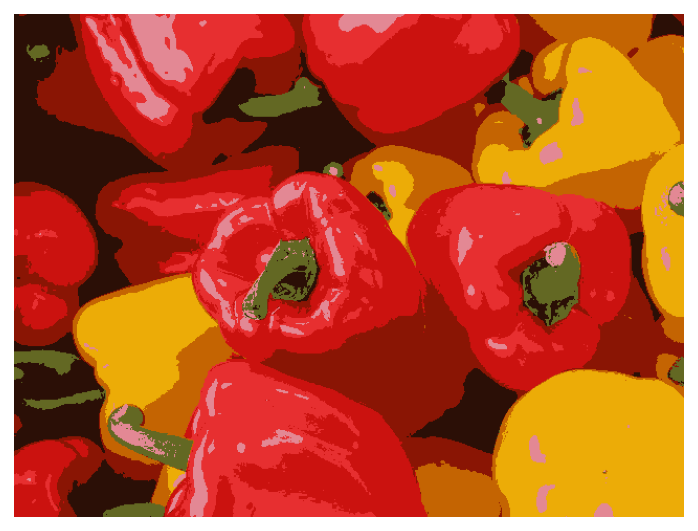

In [ ]:
img2 = img_flat2.reshape(img.shape)
plt.imshow(img2)
plt.axis('off');

In [ ]:
### BEGIN SOLUTION
def image_cluster(img, k):
    img_flat = img.reshape(img.shape[0]*img.shape[1],3)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_flat)
    img_flat2 = img_flat.copy()

    # loops for each cluster center
    for i in np.unique(kmeans.labels_):
        img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]
        
    img2 = img_flat2.reshape(img.shape)
    return img2, kmeans.inertia_
### END SOLUTION

In [ ]:
### BEGIN SOLUTION
k_vals = list(range(2,21,2))
img_list = []
inertia = []
for k in k_vals:
#    print(k)
    img2, ine = image_cluster(img,k)
    img_list.append(img2)
    inertia.append(ine)  

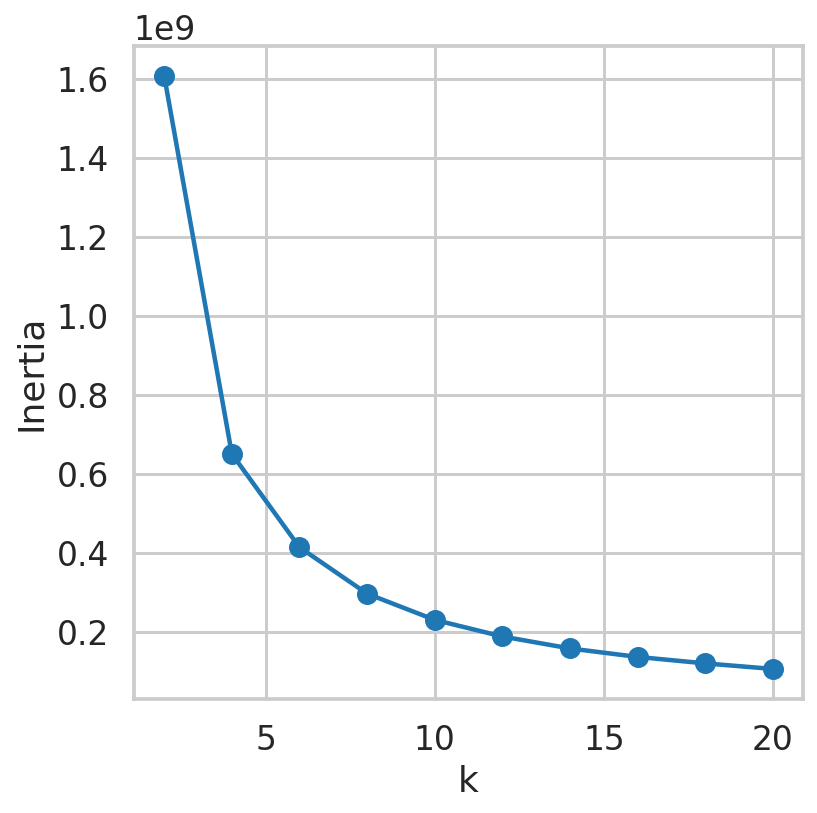

In [ ]:
# Plot to find optimal number of clusters
plt.plot(k_vals,inertia)
plt.scatter(k_vals,inertia)
plt.xlabel('k')
plt.ylabel('Inertia');
### END SOLUTION

Sometimes, the elbow method does not yield a clear decision (for example, if the elbow is not clear and sharp, or is ambiguous).  In such cases, alternatives such as the [silhouette coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) can be helpful.

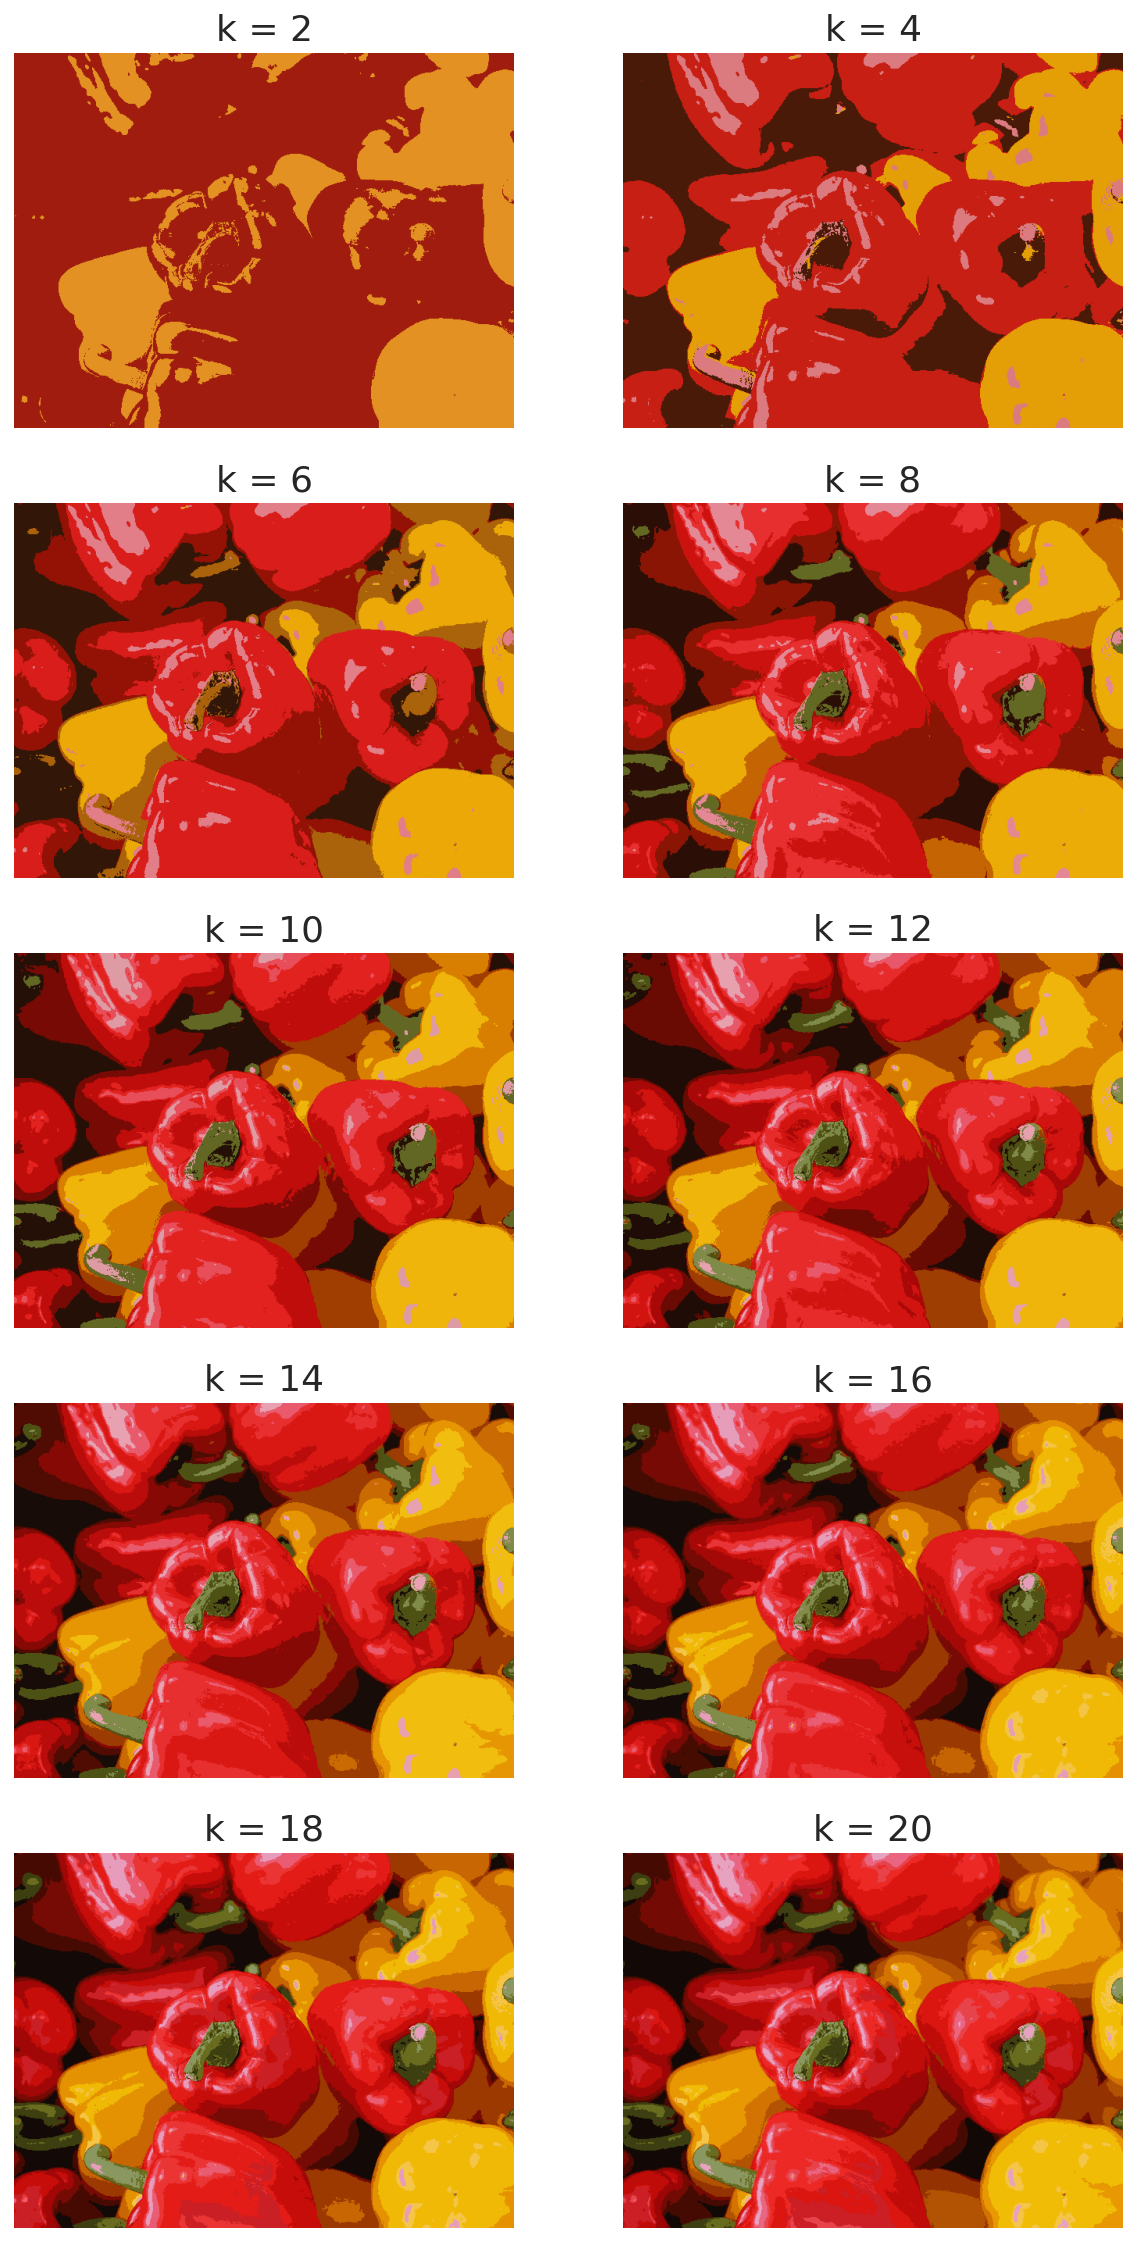

In [ ]:
### BEGIN SOLUTION
plt.figure(figsize=[10,20])
for i in range(len(k_vals)):
    plt.subplot(5,2,i+1)
    plt.imshow(img_list[i])
    plt.title('k = '+ str(k_vals[i]))
    plt.axis('off');
### END SOLUTION

# **Curse Of Dimensionality**

### In high-dimensional space, points tend to be far apart.
This impacts data analysis. Intuitively, clustering is difficult when points are far away from each other: If my next nearest neighbor is very far away, does it still make sense to call it my neighbor? This notebook will show why high-dimensional space leads to sparse data. 

### A circle inside a square 

Let's start by drawing a unit circle inside of a square. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

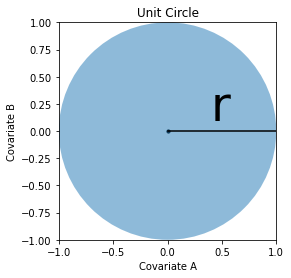

In [ ]:
def make_circle(point=0):
    fig = plt.gcf()
    ax = fig.add_subplot(111, aspect='equal')
    fig.gca().add_artist(plt.Circle((0,0),1,alpha=.5))
    ax.scatter(0,0,s=10,color="black")
    ax.plot(np.linspace(0,1,100),np.zeros(100),color="black")
    ax.text(.4,.1,"r",size=48)
    ax.set_xlim(left=-1,right=1)
    ax.set_ylim(bottom=-1,top=1)
    plt.xlabel("Covariate A")
    plt.ylabel("Covariate B")
    plt.title("Unit Circle")
    
    if point:
        ax.text(.55,.9,"Far away",color="purple")
        ax.scatter(.85,.85,s=10,color="purple")
    else: 
        plt.show()
    
make_circle()

Each axis is a different covariate. Imagine we've standard scaled our data, so they're centered on zero. This means that the average for each covariate is now zero, or the center of our circle. Points that our outside the unit circle would be harder to classify because the values of their covariates are far from the mean.

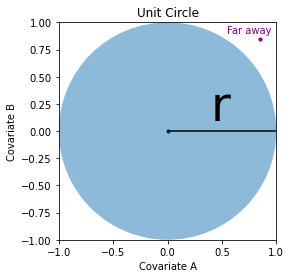

In [ ]:
make_circle(1)

### How much of the square is outside the circle? And the cube outside the sphere, etc.

We've concluded that our purple point above would be hard to classify because it's far away from the rest of our observations. But what percentage of our points in the square are outside of the circle, and thus "far away"? Let's do some math!

Since the square has length $2r$ and area $(2r)^2$, the percentage of the square outside the circle is:  1 - $\frac {\pi r^2} {(2r)^2} = 1 - \frac \pi 4$ = ~ 21% 

But what about a cube? To illustrate, we will use [matplotlib's 3-D axis](https://matplotlib.org/3.2.1/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html) which allows the '3d' projection, as well as the [itertools](https://docs.python.org/3/library/itertools.html) library, which offers a number of efficient tools for looping and combining lists. We will use the [product](https://docs.python.org/2/library/itertools.html#itertools.product) (cartesian product) and [combinations](https://docs.python.org/2/library/itertools.html#itertools.combinations) (unique subsequences) functions. 


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


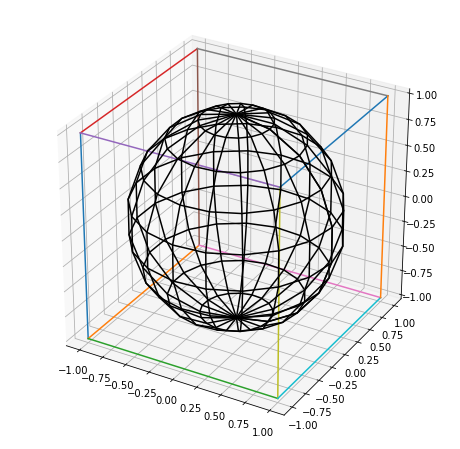

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations

# Create figure 
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
#ax.set_aspect("equal")

# Draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r,r,r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s,e))

# Draw sphere on same axis 
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax.plot_wireframe(x, y, z, color="black");

The volume of the sphere is given by the forumula: $\frac{4}{3} \pi r^3$, and since the cube has a radius of $2r$, it has volume $(2r)^3$. 

This allows us to calculate the percent of the cube's volume that's outside of the sphere: 1- $\frac {\frac 4 3 \pi r^3} {(2r)^3} = 1 - \frac \pi 6$ = ~ 48%

### Can we generalize to more than three dimensions? 

Let's draw a bunch of random points from a 0-1 distribution, then measure how far away from the origin they are. 

In [ ]:
# Draw a sample of data in two dimensions
sample_data = np.random.sample((5,2))
print("Sample data:\n", sample_data, '\n')

def norm(x): 
    ''' Measure the distance of each point from the origin.
    
    Input: Sample points, one point per row
    Output: The distance from the origin to each point
    '''
    return np.sqrt( (x**2).sum(1) ) # np.sum() sums an array over a given axis 

def in_the_ball(x): 
    ''' Determine if the sample is in the circle. 
    
    Input: Sample points, one point per row
    Output: A boolean array indicating whether the point is in the ball
    '''
    return norm(x) < 1 # If the distance measure above is <1, we're inside the ball


for x, y in zip(norm(sample_data),in_the_ball(sample_data)):
    print("Norm = ", x.round(2), "; is in circle? ", y)

Sample data:
 [[0.11373133 0.9227676 ]
 [0.70393679 0.68957588]
 [0.48369824 0.2880015 ]
 [0.4671327  0.06303192]
 [0.6298198  0.82005872]] 

Norm =  0.93 ; is in circle?  True
Norm =  0.99 ; is in circle?  True
Norm =  0.56 ; is in circle?  True
Norm =  0.47 ; is in circle?  True
Norm =  1.03 ; is in circle?  False


Can we generalize beyond two dimensions? 

In [ ]:
def what_percent_of_the_ncube_is_in_the_nball(d_dim,
                                              sample_size=10**4):
    shape = sample_size,d_dim
    data = np.array([in_the_ball(np.random.sample(shape)).mean()
                     for iteration in range(100)])
    return data.mean()

dims = range(2,15)
data = np.array(list(map(what_percent_of_the_ncube_is_in_the_nball,dims)))


for dim, percent in zip(dims,data):
    print("Dimension = ", dim, "; percent in ball = ", percent)

Dimension =  2 ; percent in ball =  0.785039
Dimension =  3 ; percent in ball =  0.5232190000000001
Dimension =  4 ; percent in ball =  0.308225
Dimension =  5 ; percent in ball =  0.164675
Dimension =  6 ; percent in ball =  0.08071
Dimension =  7 ; percent in ball =  0.03703
Dimension =  8 ; percent in ball =  0.015971
Dimension =  9 ; percent in ball =  0.006456000000000001
Dimension =  10 ; percent in ball =  0.0024129999999999998
Dimension =  11 ; percent in ball =  0.0009759999999999998
Dimension =  12 ; percent in ball =  0.00033800000000000003
Dimension =  13 ; percent in ball =  0.00012
Dimension =  14 ; percent in ball =  2.9000000000000004e-05


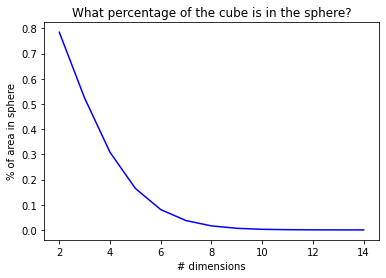

In [ ]:
# Let's plot the above percentages 

plt.plot(dims, data, color='blue')
plt.xlabel("# dimensions")
plt.ylabel("% of area in sphere")
plt.title("What percentage of the cube is in the sphere?")
plt.show()

## Check for understanding

What happens to the percentage of the area in the sphere as we increase the number of dimensions? What does this mean about how the dispersion of our data? 

---

### Measuring the distance from the center of the cube to the nearest point

Let's continue with our drawing of random points in the cube. This time, we'll draw a bunch of points, then measure the distance of all the points to the center of the cube to see how close the closest point is to the center. 

If we find out that the closest point is far from the center in high dimensions, that gives us more evidence that increasing dimensions will make it harder to classify our data properly. 

In [ ]:
def get_min_distance(dimension, sample_size=10**3):
    ''' Sample some random points and find the closet 
    of those random points to the center of the data '''
    points = np.random.sample((sample_size,dimension))-.5   # centering our data
    return np.min(norm(points))

def estimate_closest(dimension):
    ''' For a given dimension, take a random sample in that dimension and then find 
        that sample's closest point to the center of the data. 
        Repeat 100 times for the given dimension and return the min/max/mean 
        of the distance for the nearest point. '''
    data = np.array([get_min_distance(dimension) for _ in range(100)])
    return data.mean(), data.min(), data.max()

# Calculate for dimensions 2-100
dims = range(2,100)
min_distance_data = np.array(list(map(estimate_closest,dims)))

# Test it for dimension 6
print("For dimension 6: ", estimate_closest(6))

For dimension 6:  (0.2302183144979871, 0.12980428974478425, 0.3188169611745761)


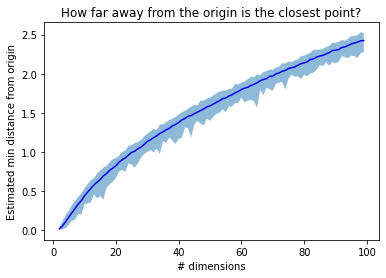

In [ ]:
# Plot the min/max/mean of the closest point for each dimension using sampling 

plt.plot(dims,min_distance_data[:,0], color='blue')
plt.fill_between(dims, min_distance_data[:,1], min_distance_data[:,2],alpha=.5)
plt.xlabel("# dimensions")
plt.ylabel("Estimated min distance from origin")
plt.title("How far away from the origin is the closest point?"); 

## Check for understanding

What would we have to do to get similar density of points as the low dimensions if we wanted to use higher dimensions of data? 

---

### How to fight the curse of dimensionality 

The curse of dimensionality is a common hurdle in real-world predictive modeling. We've already seen this in our bag-of-words approach to NLP. How can we create good models in cases where our data is of high dimensionality? 

* Feature selection: Use domain knowledge to reduce the number of features included in the model
* Feature extraction: Use dimensionality reduction techniques (e.g. PCA) to transform the raw data into a lower number of features that preserve (most of) the variability in the data

We'll talk more about PCA next.

## How does high dimensionality affect model performance?

We'll test model performance (classification accuracy) by creating some random data for classification, one set with a low number of features and another with a very high number of features. We'll then compare their performance using the same classification algorithm. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create a dataset with two features 

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=2)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

In [ ]:
DT =  DecisionTreeClassifier()
DT.fit(X_train, y_train)
score = DT.score(X_test, y_test)

In [ ]:
print("Score from two-feature classifier: ", score)

Score from two-feature classifier:  0.875


Here we see that adding additional features, even if informative, can lead to worse model performance (due to increased overfitting of training data.


### Comparing accuracy of classification against number of features

Let's see what happens if we keep adding features to our classification problem. We'll hold the number of classes at three in order to see how the curse of dimensionality hurts our model performance. 

In [ ]:
scores = []

increment, max_features = 50, 4000

for num in np.linspace(increment, max_features, increment, dtype='int'):

    X, y = make_classification(n_features=num, n_redundant=0, 
                               random_state=1, n_clusters_per_class=1, n_classes = 3)
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)

    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

    
    DT =  DecisionTreeClassifier()
    DT.fit(X_train, y_train)
    scores.append( DT.score(X_test, y_test) )


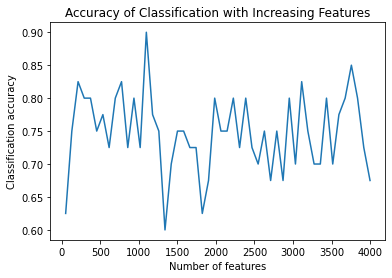

In [ ]:
plt.plot(np.linspace(increment, max_features, increment, dtype='int'),scores)
plt.title("Accuracy of Classification with Increasing Features")
plt.xlabel("Number of features")
plt.ylabel("Classification accuracy");

As we can see from the chart, adding features can lead to reductions in accuracy -- in this example accuracy is highly volatile in the number of features, and increasing features can reduce accuracy. Additionally, in our example, we specified that none of the features are redundnant (`n_redundant=0`). In practice, the situation is often worse as several of the features may be either redundant or not relevant. For example, if we are predicting customer churn using a variety of customer characteristics, we may have collected extensive data for each customer across many dimensions. This is an example of high-dimensional, which can make it difficult to apply unsupervised learning methods directly and potentially to lead to issues with the curse of dimensionality.

---

# **CLUSTERING**

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
### BEGIN SOLUTION
# Import the data
data = pd.read_csv('Wine_Quality_Data.csv')

data.head(4).T

0       1      2      3
fixed_acidity            7.4     7.8    7.8   11.2
volatile_acidity         0.7    0.88   0.76   0.28
citric_acid              0.0     0.0   0.04   0.56
residual_sugar           1.9     2.6    2.3    1.9
chlorides              0.076   0.098  0.092  0.075
free_sulfur_dioxide     11.0    25.0   15.0   17.0
total_sulfur_dioxide    34.0    67.0   54.0   60.0
density               0.9978  0.9968  0.997  0.998
pH                      3.51     3.2   3.26   3.16
sulphates               0.56    0.68   0.65   0.58
alcohol                  9.4     9.8    9.8    9.8
quality                    5       5      5      6
color                    red     red    red    red

In [ ]:
data.shape

(6497, 13)

In [ ]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [ ]:
data.color.value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [ ]:
data.quality.value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

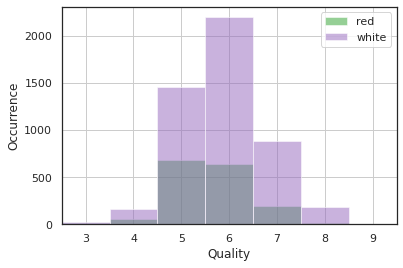

In [ ]:
# seaborn styles
sns.set_context('notebook')
sns.set_style('white')

# custom colors
red = sns.color_palette()[2]
white = sns.color_palette()[4]

# set bins for histogram
bin_range = np.array([3, 4, 5, 6, 7, 8, 9])

# plot histogram of quality counts for red and white wines
ax = plt.axes()
for color, plot_color in zip(['red', 'white'], [red, white]):
    q_data = data.loc[data.color==color, 'quality']
    q_data.hist(bins=bin_range, 
                alpha=0.5, ax=ax, 
                color=plot_color, label=color)
    

ax.legend()
ax.set(xlabel='Quality', ylabel='Occurrence')

# force tick labels to be in middle of region
ax.set_xlim(3,10)
ax.set_xticks(bin_range+0.5)
ax.set_xticklabels(bin_range);
ax.grid('off')
### END SOLUTION

In [ ]:
### BEGIN SOLUTION
float_columns = [x for x in data.columns if x not in ['color', 'quality']]

# The correlation matrix
corr_mat = data[float_columns].corr()

# Strip out the diagonal values for the next step
for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              0.000000          0.219008     0.324436   
volatile_acidity           0.219008          0.000000    -0.377981   
citric_acid                0.324436         -0.377981     0.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity              -0.111981   0.298195            -0.282735   
volatile_acidity           -0.196011   0.377124            -0.352557   
citric_acid                 0.142451   0.038998             0.133126   
residual_sugar              0.000000  -0.128940             0.402871   
chlorides                  -0.128940   0.000000            -0.195045   
free_sulfur_dioxide         0.402871  -0.195045             0.000000   
total_sulfur_dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile_acidity                 -0.414476  0.271296  0.261454   0.225984   
citric_acid                       0.195242  0.096154 -0.329808   0.056197   
residual_sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free_sulfur_dioxide               0.720934  0.025717 -0.145854  -0.188457   
total_sulfur_dioxide              0.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  0.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  0.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   0.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   

                       alcohol  
fixed_acidity        -0.095452  
volatile_acidity     -0.037640  
citric_acid          -0.010493  
residual_sugar       -0.359415  
chlorides            -0.256916  
free_sulfur_dioxide  -0.179838  
total_sulfur_dioxide -0.265740  
density              -0.686745  
pH                    0.121248  
sulphates            -0.003029  
alcohol               0.000000

In [ ]:
# Pairwise maximal correlations
corr_mat.abs().idxmax()

fixed_acidity                        density
volatile_acidity        total_sulfur_dioxide
citric_acid                 volatile_acidity
residual_sugar                       density
chlorides                          sulphates
free_sulfur_dioxide     total_sulfur_dioxide
total_sulfur_dioxide     free_sulfur_dioxide
density                              alcohol
pH                               citric_acid
sulphates                          chlorides
alcohol                              density
dtype: object

In [ ]:
skew_columns = (data[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

chlorides              5.399828
sulphates              1.797270
fixed_acidity          1.723290
volatile_acidity       1.495097
residual_sugar         1.435404
free_sulfur_dioxide    1.220066
dtype: float64

In [ ]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    data[col] = np.log1p(data[col])


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data[float_columns] = sc.fit_transform(data[float_columns])

data.head(4)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.229509          2.135767    -2.192833       -0.815173   0.624554   
1       0.550261          3.012817    -2.192833       -0.498175   1.281999   
2       0.550261          2.438032    -1.917553       -0.625740   1.104012   
3       2.802728         -0.337109     1.661085       -0.815173   0.594352   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -1.193601             -1.446359  1.034993  1.813090   0.250355   
1            -0.013944             -0.862469  0.701486 -0.115073   1.059213   
2            -0.754684             -1.092486  0.768188  0.258120   0.862549   
3            -0.574982             -0.986324  1.101694 -0.363868   0.389396   

    alcohol  quality color  
0 -0.915464        5   red  
1 -0.580068        5   red  
2 -0.580068        5   red  
3 -0.580068        6   red

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays w

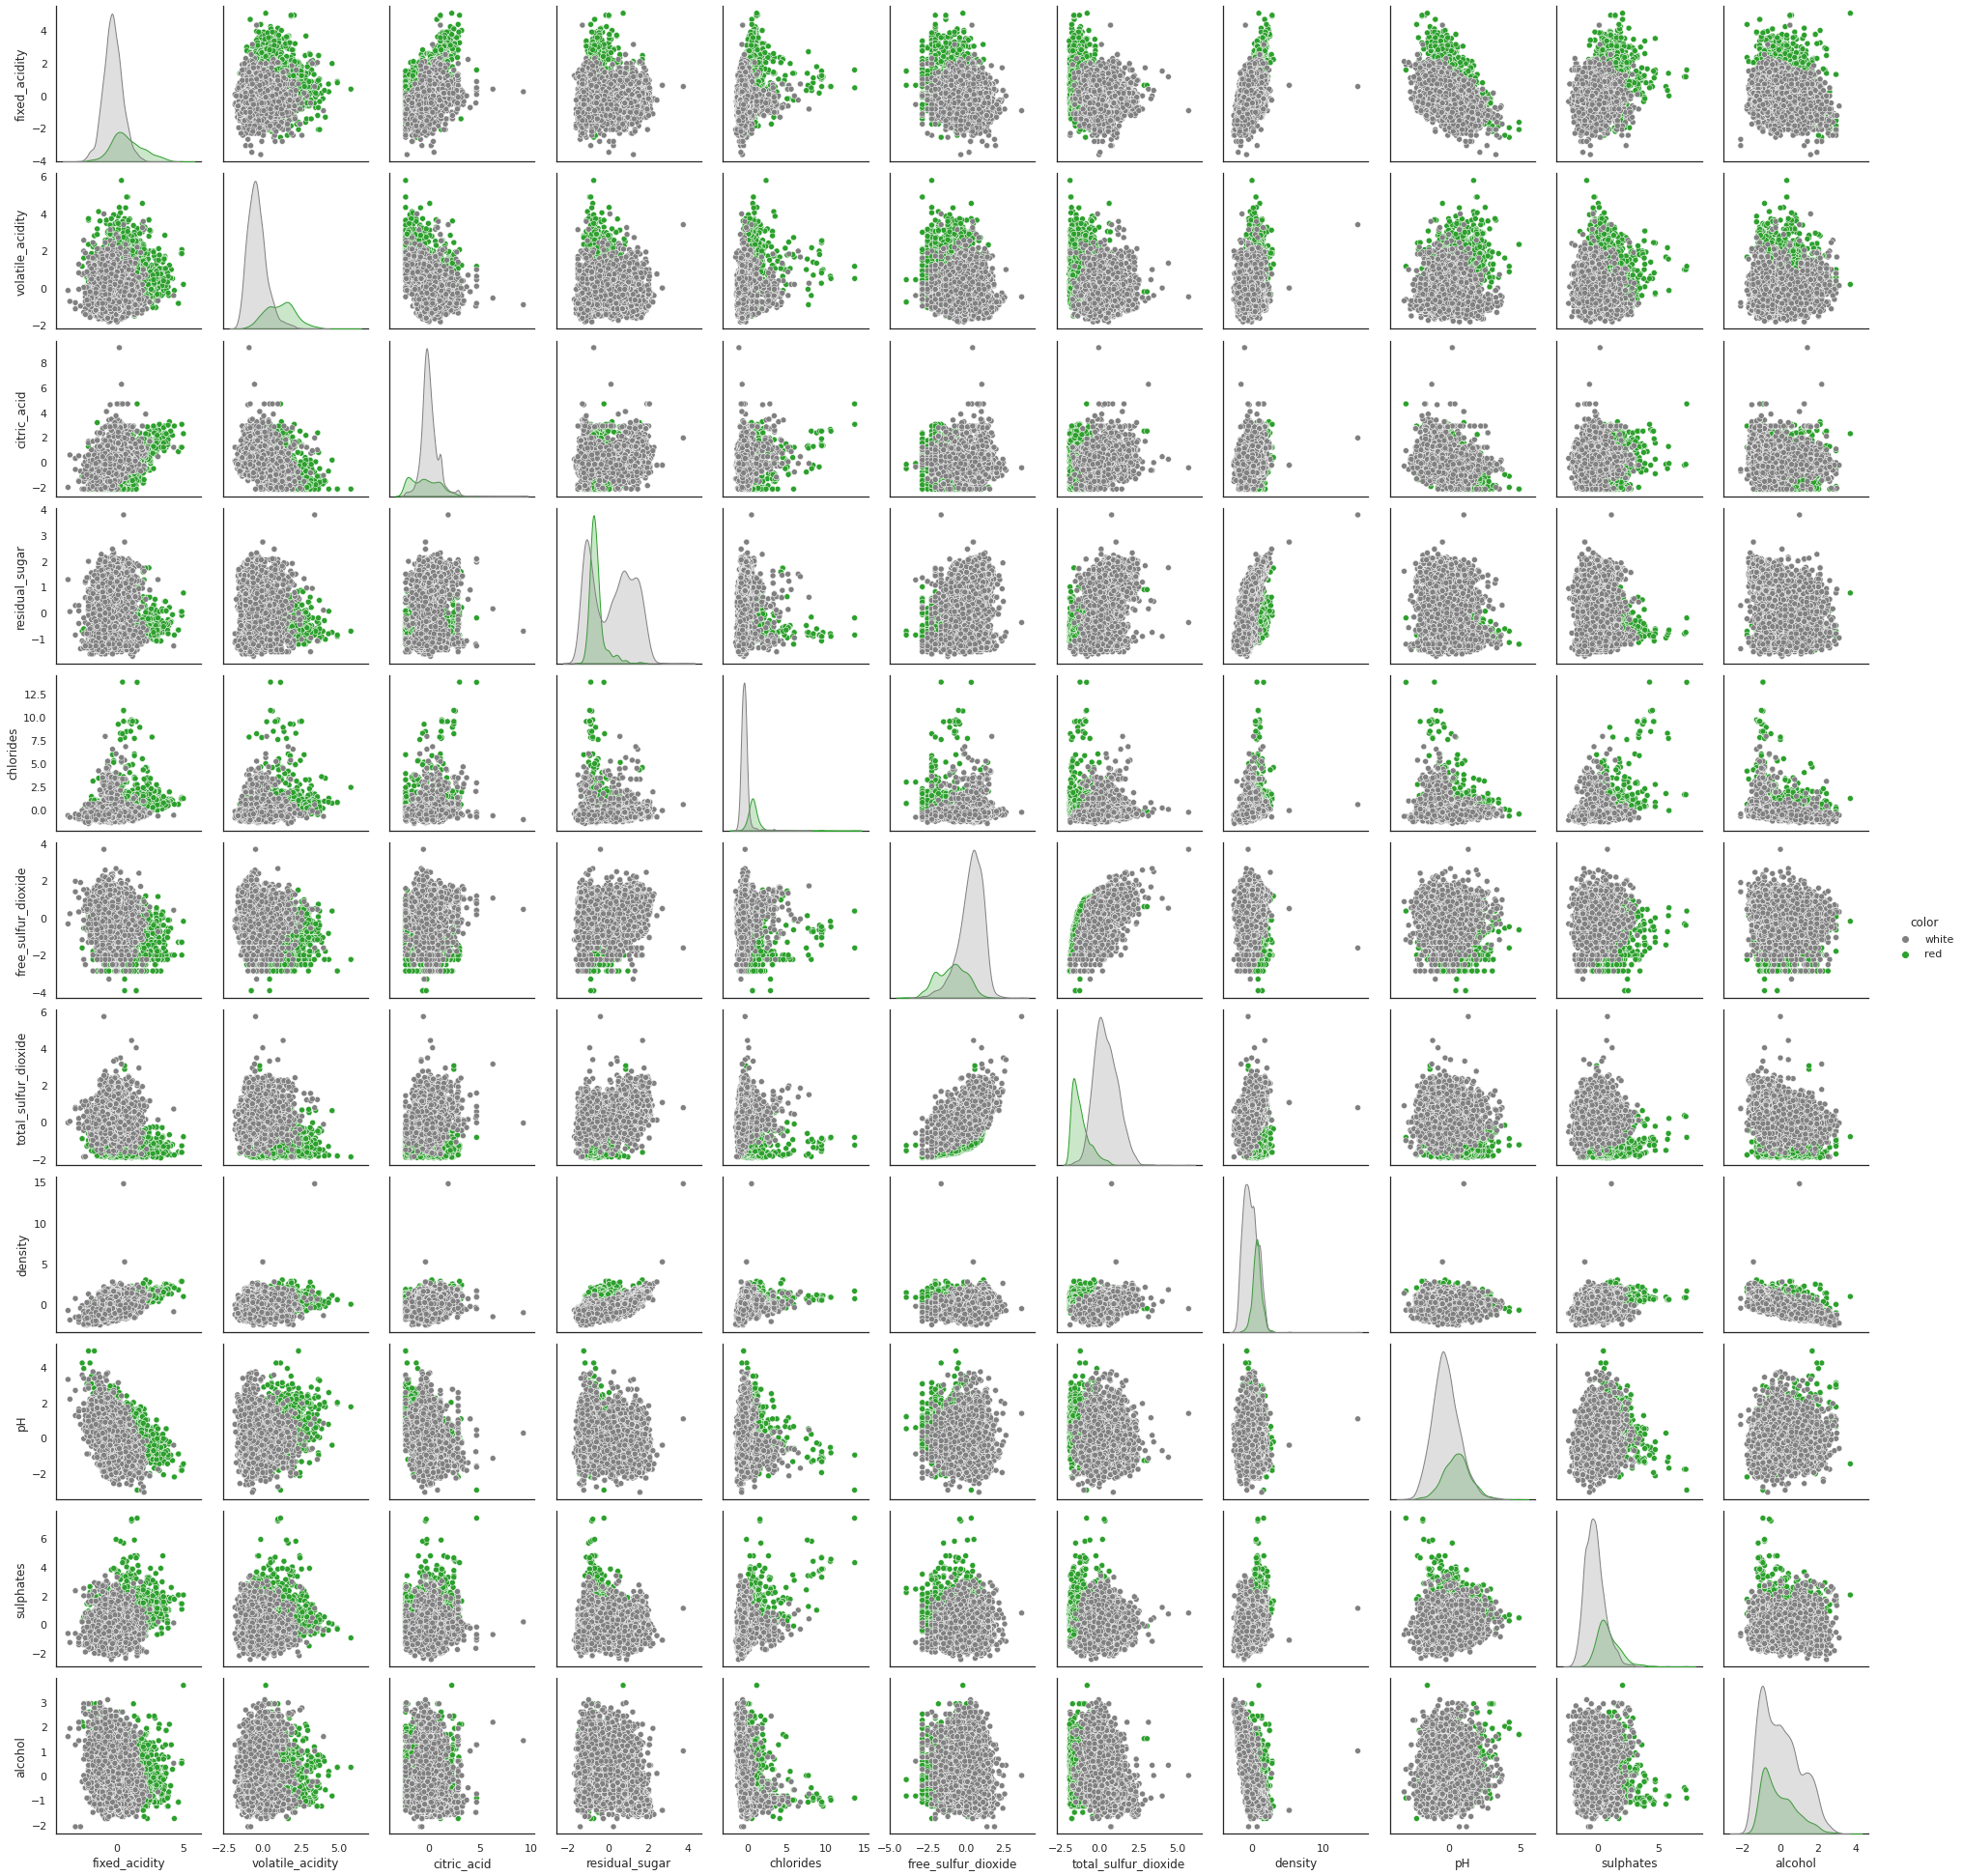

In [ ]:
sns.set_context('notebook')
sns.pairplot(data[float_columns + ['color']], 
             hue='color', 
             hue_order=['white', 'red'],
             palette={'red':red, 'white':'gray'});
### END SOLUTION

In [ ]:
from sklearn.cluster import KMeans
### BEGIN SOLUTION
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(data[float_columns])

data['kmeans'] = km.predict(data[float_columns])

In [ ]:
(data[['color','kmeans']]
 .groupby(['kmeans','color'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))
### END SOLUTION

number
kmeans color        
0      red      1576
       white      87
1      red        23
       white    4811

In [ ]:
### BEGIN SOLUTION
# Create and fit a range of models
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(data[float_columns])
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

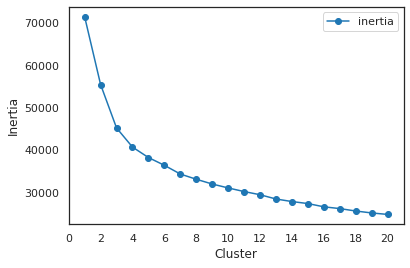

In [ ]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');
### END SOLUTION

In [ ]:
from sklearn.cluster import AgglomerativeClustering
### BEGIN SOLUTION
ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(data[float_columns])
data['agglom'] = ag.fit_predict(data[float_columns])

In [ ]:
# First, for Agglomerative Clustering:
(data[['color','agglom','kmeans']]
 .groupby(['color','agglom'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
color agglom        
red   0           31
      1         1568
white 0         4755
      1          143

In [ ]:
# Comparing with KMeans results:
(data[['color','agglom','kmeans']]
 .groupby(['color','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
color kmeans        
red   0         1576
      1           23
white 0           87
      1         4811

In [ ]:
# Comparing results:
(data[['color','agglom','kmeans']]
 .groupby(['color','agglom','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
color agglom kmeans        
red   0      0           13
             1           18
      1      0         1563
             1            5
white 0      0           38
             1         4717
      1      0           49
             1           94

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

### BEGIN SOLUTION
y = (data['quality'] > 7).astype(int)
X_with_kmeans = data.drop(['agglom', 'color', 'quality'], axis=1)
X_without_kmeans = X_with_kmeans.drop('kmeans', axis=1)
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)

def get_avg_roc_10splits(estimator, X, y):
    roc_auc_list = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)
        y_scored = estimator.predict_proba(X_test)[:, 1]
        roc_auc_list.append(roc_auc_score(y_test, y_scored))
    return np.mean(roc_auc_list)
# return classification_report(y_test, y_predicted)

estimator = RandomForestClassifier()
roc_with_kmeans = get_avg_roc_10splits(estimator, X_with_kmeans, y)
roc_without_kmeans = get_avg_roc_10splits(estimator, X_without_kmeans, y)
print("Without kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_without_kmeans))
print("Using kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_with_kmeans))

Without kmeans cluster as input to Random Forest, roc-auc is "0.9109563492063492"
Using kmeans cluster as input to Random Forest, roc-auc is "0.9026746031746032"


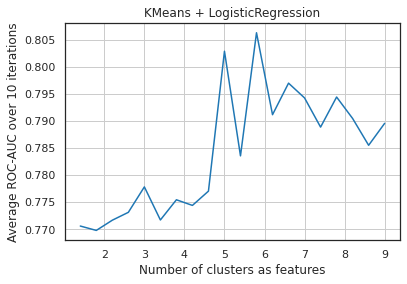

In [ ]:
from sklearn.linear_model import LogisticRegression

X_basis = data[float_columns]
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)

def create_kmeans_columns(n):
    km = KMeans(n_clusters=n)
    km.fit(X_basis)
    km_col = pd.Series(km.predict(X_basis))
    km_cols = pd.get_dummies(km_col, prefix='kmeans_cluster')
    return pd.concat([X_basis, km_cols], axis=1)

estimator = LogisticRegression()
ns = range(1, 21)
roc_auc_list = [get_avg_roc_10splits(estimator, create_kmeans_columns(n), y)
                for n in ns]

ax = plt.axes()
ax.plot(ns, roc_auc_list)
ax.set(
    xticklabels= ns,
    xlabel='Number of clusters as features',
    ylabel='Average ROC-AUC over 10 iterations',
    title='KMeans + LogisticRegression'
)
ax.grid(True)
### END SOLUTION

# **Principal Component Analysis**

We will be using customer data from a [Portuguese wholesale distributor](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) for clustering. This data file is called `Wholesale_Customers_Data`.

It contains the following features:

* Fresh: annual spending (m.u.) on fresh products
* Milk: annual spending (m.u.) on milk products
* Grocery: annual spending (m.u.) on grocery products
* Frozen: annual spending (m.u.) on frozen products
* Detergents_Paper: annual spending (m.u.) on detergents and paper products
* Delicatessen: annual spending (m.u.) on delicatessen products
* Channel: customer channel (1: hotel/restaurant/cafe or 2: retail)
* Region: customer region (1: Lisbon, 2: Porto, 3: Other)

In this data, the values for all spending are given in an arbitrary unit (m.u. = monetary unit).

In [1]:
import os, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Wholesale_Customers_Data.csv', sep=',')

In [3]:
data.shape

(440, 8)

In [4]:
data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [5]:
data = data.drop(['Channel', 'Region'], axis=1)

In [6]:
data.dtypes

Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [9]:
# Convert to floats
for col in data.columns:
    data[col] = data[col].astype(float)

In [8]:
data_orig = data.copy()

In [10]:
corr_mat = data.corr()

# Strip the diagonal for future examination
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             0.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  0.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  0.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  0.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          0.000000   
Delicassen        0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicassen  
Fresh               0.244690  
Milk                0.406368  
Grocery             0.205497  
Frozen              0.390947  
Detergents_Paper    0.069291  
Delicassen          0.000000

In [11]:
corr_mat.abs().idxmax()

Fresh                         Frozen
Milk                         Grocery
Grocery             Detergents_Paper
Frozen                    Delicassen
Detergents_Paper             Grocery
Delicassen                      Milk
dtype: object

In [12]:
log_columns = data.skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]

log_columns

Delicassen          11.151586
Frozen               5.907986
Milk                 4.053755
Detergents_Paper     3.631851
Grocery              3.587429
Fresh                2.561323
dtype: float64

In [13]:
# The log transformations
for col in log_columns.index:
    data[col] = np.log1p(data[col])

In [14]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

for col in data.columns:
    data[col] = mms.fit_transform(data[[col]]).squeeze()

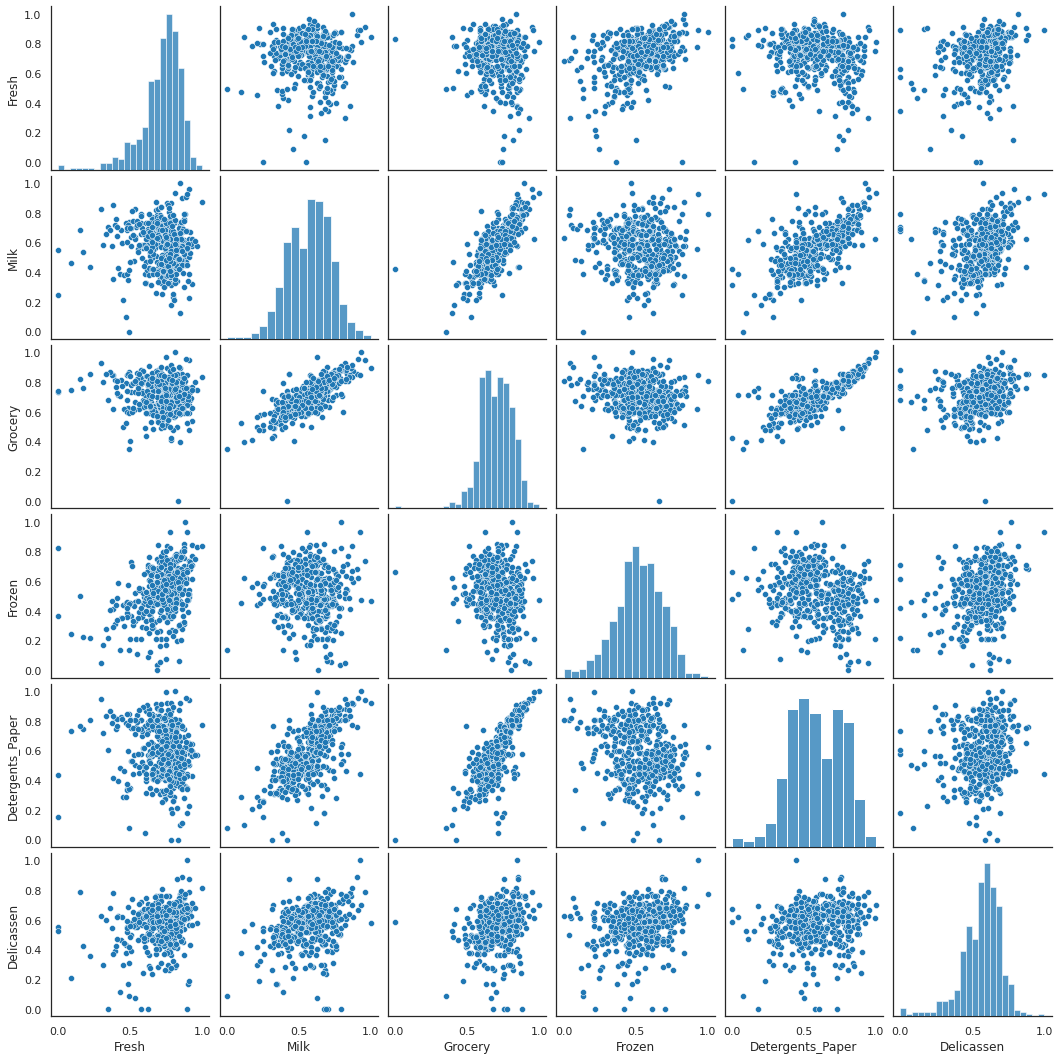

In [15]:
sns.set_context('notebook')
sns.set_style('white')
sns.pairplot(data);

In [16]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# The custom NumPy log transformer
log_transformer = FunctionTransformer(np.log1p)

# The pipeline
estimators = [('log1p', log_transformer), ('minmaxscale', MinMaxScaler())]
pipeline = Pipeline(estimators)

# Convert the original data
data_pipe = pipeline.fit_transform(data_orig)

In [17]:
np.allclose(data_pipe, data)

True

In [18]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 6):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': data.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

model       var
n                               
1  PCA(n_components=1)  0.448011
2  PCA(n_components=2)   0.72099
3  PCA(n_components=3)  0.827534
4  PCA(n_components=4)  0.923045
5  PCA(n_components=5)  0.979574

In [19]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features  Delicassen  Detergents_Paper     Fresh    Frozen   Grocery      Milk
n                                                                             
1           0.071668          0.335487  0.060620  0.095979  0.190236  0.246010
2           0.151237          0.177519  0.158168  0.222172  0.112032  0.178872
3           0.165518          0.145815  0.211434  0.268363  0.084903  0.123967
4           0.224259          0.149981  0.239527  0.214275  0.070971  0.100987
5           0.211840          0.182447  0.196382  0.178104  0.067338  0.163888

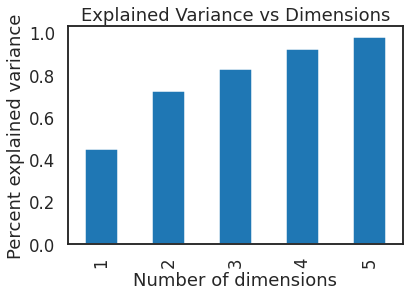

In [20]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

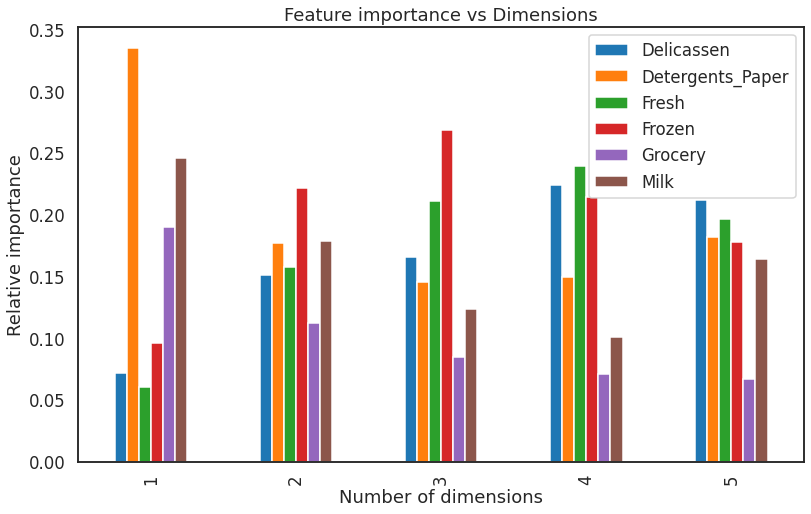

In [21]:
ax = features_df.plot(kind='bar', figsize=(13,8))
ax.legend(loc='upper right')
ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');

In [22]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Custom scorer--use negative rmse of inverse transform
def scorer(pcamodel, X, y=None):

    try:
        X_val = X.values
    except:
        X_val = X
        
    # Calculate and inverse transform the data
    data_inv = pcamodel.fit(X_val).transform(X_val)
    data_inv = pcamodel.inverse_transform(data_inv)
    
    # The error calculation
    mse = mean_squared_error(data_inv.ravel(), X_val.ravel())
    
    # Larger values are better for scorers, so take negative value
    return -1.0 * mse

# The grid search parameters
param_grid = {'gamma':[0.001, 0.01, 0.05, 0.1, 0.5, 1.0],
              'n_components': [2, 3, 4]}

# The grid search
kernelPCA = GridSearchCV(KernelPCA(kernel='rbf', fit_inverse_transform=True),
                         param_grid=param_grid,
                         scoring=scorer,
                         n_jobs=-1)


kernelPCA = kernelPCA.fit(data)

kernelPCA.best_estimator_

KernelPCA(fit_inverse_transform=True, gamma=1.0, kernel='rbf', n_components=4)

Let's explore how our model accuracy may change if we include a `PCA` in our model building pipeline. Let's plan to use sklearn's `Pipeline` class and create a pipeline that has the following steps:
<ol>
  <li>A scaler</li>
  <li>`PCA(n_components=n)`</li>
  <li>`LogisticRegression`</li>
</ol>

* Load the Human Activity data from the datasets.
* Write a function that takes in a value of `n` and makes the above pipeline, then predicts the "Activity" column over a 5-fold StratifiedShuffleSplit, and returns the average test accuracy
* For various values of n, call the above function and store the average accuracies.
* Plot the average accuracy by number of dimensions.

In [23]:
data = pd.read_csv('Human_Activity_Recognition_Using_Smartphones_Data.csv', sep=',')

In [24]:
data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = data.drop('Activity', axis=1)
y = data.Activity
sss = StratifiedShuffleSplit(n_splits=5, random_state=42)

def get_avg_score(n):
    pipe = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', LogisticRegression(solver='liblinear'))
    ]
    pipe = Pipeline(pipe)
    scores = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, pipe.predict(X_test)))
    return np.mean(scores)


ns = [10, 20, 50, 100, 150, 200, 300, 400]
score_list = [get_avg_score(n) for n in ns]

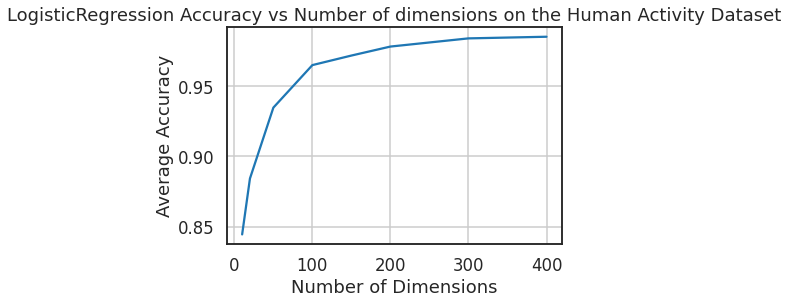

In [26]:
sns.set_context('talk')

ax = plt.axes()
ax.plot(ns, score_list)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='LogisticRegression Accuracy vs Number of dimensions on the Human Activity Dataset')
ax.grid(True)

# **NON NEGATIVE MATRIX FACTORIZATION**

We'll be using the BBC dataset. These are articles collected from 5 different topics, with the data pre-processed. 

These data are available in the data folder (or online [here](http://mlg.ucd.ie/files/datasets/bbc.zip)). The data consists of a few files. The steps we'll be following are:

* *bbc.terms* is just a list of words 
* *bbc.docs* is a list of artcles listed by topic.

At a high level, we're going to 

1. Turn the `bbc.mtx` file into a sparse matrix (a [sparse matrix](https://docs.scipy.org/doc/scipy/reference/sparse.html) format can be useful for matrices with many values that are 0, and save space by storing the position and values of non-zero elements).
1. Decompose that sparse matrix using NMF.
1. Use the resulting components of NMF to analyze the topics that result.

In [27]:
with open('bbc.mtx') as f:
    content = f.readlines()

In [28]:
content.pop(0)
content.pop(0)

'9635 2225 286774\n'

In [29]:
sparsemat = [tuple(map(int,map(float,c.split()))) for c in content]
# Let's examine the first few elements
sparsemat[:8]

[(1, 1, 1),
 (1, 7, 2),
 (1, 11, 1),
 (1, 14, 1),
 (1, 15, 2),
 (1, 19, 2),
 (1, 21, 1),
 (1, 29, 1)]

In [30]:
import numpy as np
from scipy.sparse import coo_matrix
rows = [x[0] for x in sparsemat]
cols = [x[1] for x in sparsemat]
values = [x[2] for x in sparsemat]
coo = coo_matrix((values, (rows, cols)))

NMF is a way of decomposing a matrix of documents and words so that one of the matrices can be interpreted as the "loadings" or "weights" of each word on a topic. 

In [31]:
from sklearn.decomposition import NMF
model = NMF(n_components=5, init='random', random_state=818)
doc_topic = model.fit_transform(coo)

doc_topic.shape
# we should have 9636 observations (articles) and five latent features

(9636, 5)

In [32]:
# find feature with highest value per doc
np.argmax(doc_topic, axis=1)

array([0, 0, 2, ..., 4, 4, 4])

In [33]:
model.components_.shape

(5, 2226)

In [34]:
with open('bbc.terms') as f:
    content = f.readlines()
words = [c.split()[0] for c in content]

In [35]:
topic_words = []
for r in model.components_:
    a = sorted([(v,i) for i,v in enumerate(r)],reverse=True)[0:12]
    topic_words.append([words[e[1]] for e in a])

In [36]:
# Here, each set of words relates to the corresponding topic (ie the first set of words relates to topic 'Business', etc.)
topic_words[:5]

[['bondi',
  'stanlei',
  'continent',
  'mortgag',
  'bare',
  'least',
  'extent',
  '200',
  'leav',
  'frustrat',
  'yuan',
  'industri'],
 ['manipul',
  'teenag',
  'drawn',
  'go',
  'prosecutor',
  'herbert',
  'host',
  'protest',
  'hike',
  'nation',
  'calcul',
  'power'],
 ['dimens',
  'hous',
  'march',
  'wider',
  'owner',
  'intend',
  'declin',
  'forc',
  'posit',
  'founder',
  'york',
  'unavail'],
 ['rome',
  'ft',
  'regain',
  'lawmak',
  'outright',
  'resum',
  'childhood',
  'greatest',
  'citi',
  'stagnat',
  'crown',
  'bodi'],
 ['build',
  'empir',
  'isol',
  '£12',
  'restructur',
  'closer',
  'plung',
  'depreci',
  'durham',
  'race',
  'juli',
  'segreg']]

The original data had 5 topics, as listed in `bbc.docs` (which these topic words relate to). 

```
Business
Entertainment
Politics
Sport
Tech
```

In "real life", we would have found a way to use these to inform the model. But for this little demo, we can just compare the recovered topics to the original ones. And they seem to match reasonably well. The order is different, which is to be expected in this kind of model.

In [37]:
with open('bbc.docs') as d:
    doc_content = d.readlines()
    
doc_content[:8]

['business.001\n',
 'business.002\n',
 'business.003\n',
 'business.004\n',
 'business.005\n',
 'business.006\n',
 'business.007\n',
 'business.008\n']